<a href="https://colab.research.google.com/github/mhask94/cs474_labs_f2019/blob/master/DL_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6: Sequence-to-sequence models

## Description:
For this lab, you will code up the [char-rnn model of Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). This is a recurrent neural network that is trained probabilistically on sequences of characters, and that can then be used to sample new sequences that are like the original.

This lab will help you develop several new skills, as well as understand some best practices needed for building large models. In addition, we'll be able to create networks that generate neat text!

## There are two parts of this lab:
###  1.   Wiring up a basic sequence-to-sequence computation graph
###  2.   Implementing your own GRU cell.


An example of my final samples are shown below (more detail in the
final section of this writeup), after 150 passes through the data.
Please generate about 15 samples for each dataset.

<code>
And ifte thin forgision forward thene over up to a fear not your
And freitions, which is great God. Behold these are the loss sub
And ache with the Lord hath bloes, which was done to the holy Gr
And appeicis arm vinimonahites strong in name, to doth piseling 
And miniquithers these words, he commanded order not; neither sa
And min for many would happine even to the earth, to said unto m
And mie first be traditions? Behold, you, because it was a sound
And from tike ended the Lamanites had administered, and I say bi
</code>


---

## Part 0: Readings, data loading, and high level training

---

There is a tutorial here that will help build out scaffolding code, and get an understanding of using sequences in pytorch.

* Read the following

> * [Pytorch sequence-to-sequence tutorial](https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html)
* [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)






In [1]:
! wget -O ./text_files.tar.gz 'https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlifkda6h0x5bk%2Fhzosotq4zil49m%2Fjn13x09arfeb%2Ftext_files.tar.gz' 
! tar -xzf text_files.tar.gz
! pip install unidecode
! pip install torch

import unidecode
import string
import random
import re
 
from IPython.core.debugger import set_trace
 
all_characters = string.printable
n_characters = len(all_characters)
file = unidecode.unidecode(open('./text_files/lotr.txt').read())
while file.count('\n\n') > 0: # get rid of newline characters
  file = file.replace('\n\n', '\n')
file = file.replace('\n', ' ')
file = file.replace('  ', ' ')
file_len = len(file)
print('file_len =', file_len)

--2019-10-19 21:13:50--  https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlifkda6h0x5bk%2Fhzosotq4zil49m%2Fjn13x09arfeb%2Ftext_files.tar.gz
Resolving piazza.com (piazza.com)... 52.45.119.166, 3.214.17.10, 52.2.48.133, ...
Connecting to piazza.com (piazza.com)|52.45.119.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://d1b10bmlvqabco.cloudfront.net/attach/jlifkda6h0x5bk/hzosotq4zil49m/jn13x09arfeb/text_files.tar.gz [following]
--2019-10-19 21:13:51--  https://d1b10bmlvqabco.cloudfront.net/attach/jlifkda6h0x5bk/hzosotq4zil49m/jn13x09arfeb/text_files.tar.gz
Resolving d1b10bmlvqabco.cloudfront.net (d1b10bmlvqabco.cloudfront.net)... 99.86.32.60, 99.86.32.164, 99.86.32.66, ...
Connecting to d1b10bmlvqabco.cloudfront.net (d1b10bmlvqabco.cloudfront.net)|99.86.32.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1533290 (1.5M) [application/x-gzip]
Saving to: ‘./text_files.tar.gz’

./text_files.tar.gz 100%[========

In [15]:
import glob
print(glob.glob("./text_files/*.txt"))

['./text_files/tiny_shakespeare.txt', './text_files/abcd.txt', './text_files/abab.txt', './text_files/alma.txt', './text_files/test1.txt', './text_files/lotr.txt', './text_files/switch.bat.txt']


In [2]:
chunk_len = 200
 
def random_chunk():
  start_index = random.randint(0, file_len - chunk_len)
  end_index = start_index + chunk_len + 1
  return file[start_index:end_index]
  
print(random_chunk())

en another clear voice, as young and as ancient as Spring, like the song of a glad water flowing down into the night from a bright morning in the hills, came falling like silver to meet them: Now let t


In [3]:
import torch

# Turn string into list of longs
def char_tensor(string):
  tensor = torch.zeros(len(string)).long()
  for c in range(len(string)):
      tensor[c] = all_characters.index(string[c])
  return tensor

print(char_tensor('abcDEF'))

tensor([10, 11, 12, 39, 40, 41])


---

## Part 4: Creating your own GRU cell 

**(Come back to this later - its defined here so that the GRU will be defined before it is used)**

---

The cell that you used in Part 1 was a pre-defined Pytorch layer. Now, write your own GRU class using the same parameters as the built-in Pytorch class does.

Please try not to look at the GRU cell definition. The answer is right there in the code, and in theory, you could just cut-and-paste it. This bit is on your honor!

**TODO:**

**DONE:**
* Create a custom GRU cell


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable


class GRU(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(GRU, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.n_layers = num_layers
    
#     self.w_ir = []
#     self.w_hr = []
#     self.w_iz = []
#     self.w_hz = []
#     self.w_in = []
#     self.w_hn = []
    
#     for l in range(self.n_layers):
#       self.w_ir.append(nn.Linear(input_size,  hidden_size))
#       self.w_hr.append(nn.Linear(hidden_size, hidden_size))
#       self.w_iz.append(nn.Linear(input_size,  hidden_size))
#       self.w_hz.append(nn.Linear(hidden_size, hidden_size))
#       self.w_in.append(nn.Linear(input_size,  hidden_size))
#       self.w_hn.append(nn.Linear(hidden_size, hidden_size))

    self.w_ir = nn.Linear(input_size,  hidden_size)
    self.w_hr = nn.Linear(hidden_size, hidden_size)
    self.w_iz = nn.Linear(input_size,  hidden_size)
    self.w_hz = nn.Linear(hidden_size, hidden_size)
    self.w_in = nn.Linear(input_size,  hidden_size)
    self.w_hn = nn.Linear(hidden_size, hidden_size)
    
    self.sig = nn.Sigmoid()
    self.tan = nn.Tanh()    
    
  def forward(self, inputs, prev_hidden):
#     hidden = torch.empty(prev_hidden.shape)

#     for l in range(self.n_layers):
    r_t = self.sig(self.w_ir(inputs) + self.w_hr(prev_hidden))
    z_t = self.sig(self.w_iz(inputs) + self.w_hz(prev_hidden))
    n_t = self.tan(self.w_in(inputs) + r_t*self.w_hn(prev_hidden))
    hidden = (1 - z_t) * n_t + z_t * prev_hidden
    output = hidden[-1:]
    
    return output, hidden
  

---

##  Part 1: Building a sequence to sequence model

---

Great! We have the data in a useable form. We can switch out which text file we are reading from, and trying to simulate.

We now want to build out an RNN model, in this section, we will use all built in Pytorch pieces when building our RNN class.


**TODO:**

**DONE:**
* Create an RNN class that extends from nn.Module.


In [0]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, n_layers=1):
    super(RNN, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.n_layers = n_layers
    
    self.embedding = nn.Embedding(self.input_size, self.hidden_size)
    # inputs are embedded to be hidden_size
    self.gru = GRU(input_size=hidden_size, hidden_size=hidden_size, 
                      num_layers=n_layers)
    self.relu = nn.ReLU()
    self.decode = nn.Linear(self.hidden_size, self.output_size)

  def forward(self, input_char, hidden):
    embed = self.embedding(input_char).view(1,1,-1)
    output, hidden = self.gru(embed, hidden)
    output = self.relu(self.decode(output))
    
    return output, hidden

  def init_hidden(self):
    return torch.zeros(self.n_layers, 1, self.hidden_size)

In [0]:
def random_training_set():    
  chunk = random_chunk()
  inp = char_tensor(chunk[:-1])
  target = char_tensor(chunk[1:])
  return inp, target

---

## Part 2: Sample text and Training information

---

We now want to be able to train our network, and sample text after training.

This function outlines how training a sequence style network goes. 

**TODO:**

**DONE:**
* Fill in the pieces.



In [0]:
def train(input_str, target_str):
  decoder_optimizer.zero_grad()
  hidden = decoder.init_hidden()
  loss = 0
  
  for in_char, target_char in zip(input_str, target_str):
    
    char_hat, hidden = decoder(in_char, hidden)
    target_char = target_char.unsqueeze(0)
    loss += criterion(char_hat.squeeze(0), target_char)
    
  loss.backward()
  decoder_optimizer.step()
  
  return loss.item()

---

## Part 3: Sample text and Training information

---

You can at this time, if you choose, also write out your train loop boilerplate that samples random sequences and trains your RNN. This will be helpful to have working before writing your own GRU class.

If you are finished training, or during training, and you want to sample from the network you may consider using the following function. If your RNN model is instantiated as `decoder`then this will probabilistically sample a sequence of length `predict_len`

**TODO:**

**DONE:**
* Fill out the evaluate function to generate text frome a primed string


In [0]:
def evaluate(prime_str='A', predict_len=100, temperature=0.6):
  with torch.no_grad():
    hidden = decoder.init_hidden()
    prediction = prime_str + '' # copies prime_str values, not a ptr
    primer_input = char_tensor(prime_str)
    all_chars = string.printable 
    
    for char in primer_input[:-1]:
      _, hidden = decoder(char, hidden)
    
    in_char = primer_input[-1]
    
    for p in range(predict_len):
      pred, hidden = decoder(in_char, hidden)
      pred_dist = F.softmax(pred.squeeze(0) / temperature, dim=1)
      top_idx = torch.multinomial(pred_dist, 1)[0]
      
      char_decoded = all_chars[top_idx]
      in_char = char_tensor(char_decoded)
      prediction += char_decoded
      
  return prediction

---

## Part 4: (Create a GRU cell, requirements above)

---



---

## Part 5: Run it and generate some text!

---

Assuming everything has gone well, you should be able to run the main function in the scaffold code, using either your custom GRU cell or the built in layer, and see output something like this. I trained on the “lotr.txt” dataset, using chunk_length=200, hidden_size=100 for 2000 epochs gave.

**TODO:** 

**DONE:**
* Create some cool output


In [0]:
import time
n_epochs = 5000
print_every = 200
plot_every = 10
hidden_size = 200
n_layers = 3
lr = 0.001
 
decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
 
start = time.time()
all_losses = []
loss_avg = 0

In [10]:
for epoch in range(n_epochs):
  loss_ = train(*random_training_set())       
  loss_avg += loss_

  if epoch % print_every == 0:
    print('[%s (%d %d%%) %.4f]' % (time.time() - start, epoch, epoch / n_epochs * 100, loss_))
    print(evaluate('Wh', predict_len=100, temperature=0.6), '\n')

  if epoch % plot_every == 0:
    all_losses.append(loss_avg / plot_every)
    loss_avg = 0

[0.43207693099975586 (0 0%) 921.3820]
xohE&L#!03H:Zu5A0B9U?KM"1'$.*P[?*y'<MO4s9pug01,> 

[78.68216896057129 (200 4%) 435.5261]
Whe head to the the thing the the hastint has skinged and the and to the niling the and wat siasA haro 

[156.43271708488464 (400 8%) 435.5623]
Whe and the the are and canstere wore the where and saind the cand. go and cound the kne wather it sai 

[235.2494945526123 (600 12%) 406.8815]
What the lound the stong a down the the it in as at his and that hoult and the do the lonting that wen 

[314.0422761440277 (800 16%) 350.5024]
Whe ~or the long great befreed the dold have sing was and to the were the was to the worder hould they 

[392.540890455246 (1000 20%) 460.0086]
Whord. 'Where the greather the bown be canter now a dow do said dooked were of coald said not of the r 

[470.6464116573334 (1200 24%) 330.0115]
Wh the ride not to the many a the chalking and the greet a long the great he courtherned drouss to the 

[549.4033305644989 (1400 28%) 346.7403]
When

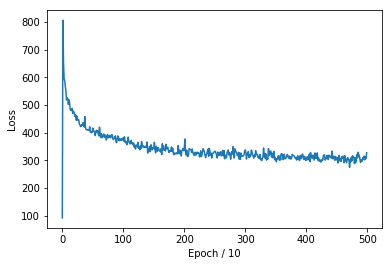

In [13]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(range(len(all_losses)), all_losses, label='loss')
plt.xlabel('Epoch / {}'.format(plot_every))
_ = plt.ylabel('Loss')

In [14]:
for i in range(10):
  start_strings = [" Th", " wh", " he", " I ", " ca", " G", " lo", " ra"]
  start = random.randint(0,len(start_strings)-1)
  print(start_strings[start])
  print(evaluate(start_strings[start], 200, temperature=0.58), '\n')

 he
 he was a stark that in the earth and a cliff fall of the failing the name he had all the sandil their had behind her and flew speak you know, them , failings and that in the thing son and then the say,  

 ra
 ran here and companions a pressed and lay in the old dark some things that the keeping in the mount of the old the hobbits as the hobbitswered the passing the glanned in the house and strent about the s 

 wh
 what they seemed the end in the hobbits be shadows of the mind, and the more, so fell in the graves and leet was said on the great in silendand fell, and even a like the shadow. I feared at in the stone 

 ra
 ran and their faces and dark death the stood things that he leave from the Warl! We had they had though them to shadows of the hissed his far black of speed. I will silend of the dark as he seemed then  

 wh
 what the feet the tide the hobbits still though a great great withranding the shadows that was any rears of the great mind his friend, as if you secret in 

---

## Part 6: Generate output on a different dataset

---

**TODO:**

**DONE:**
* Choose a textual dataset. Here are some [text datasets](https://www.kaggle.com/datasets?tags=14104-text+data%2C13205-text+mining) from Kaggle 

* Generate some decent looking results and evaluate your model's performance (say what it did well / not so well)



file_len = 462561
[0.42401838302612305 (0 0%) 915.5421]
sK
$flFqTa
&2ch)FIwDl+A-pOk! 1W|J 

[79.2475745677948 (200 4%) 529.9556]
Whon dested, and the his theay and to were his ow the lad the ahe brey out the wich had or the the and 

[157.52569270133972 (400 8%) 351.1539]
Whre peall ove wards out the kand the shold, who his he should the and to he same that he pare the war 

[235.7586543560028 (600 12%) 316.1318]
Whour sent, the grether and the repites, and the reathere oprering the came said there in the king the 

[314.26549220085144 (800 16%) 294.0076]
What cause and unto the city by the name to that the pearst the chight not came to their his shall the 

[392.58536982536316 (1000 20%) 320.8643]
Whe pass the lands ok is they was the word on the time to that the land o) repent to desaid upon the w 

[470.9219169616699 (1200 24%) 293.3231]
Whe was they words of the words of the people, and came to them and the word was and the words, behold 

[548.946722984314 (1400 28%) 325.8024]
Wha

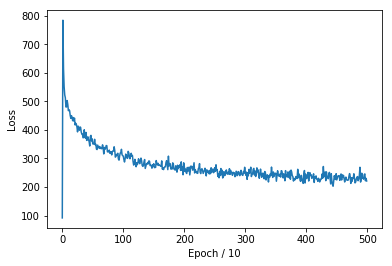

In [16]:
file = unidecode.unidecode(open('./text_files/alma.txt').read())
while file.count('\n\n') > 0: # get rid of newline characters
  file = file.replace('\n\n', '\n')
file = file.replace('\n', ' ')
file = file.replace('  ', ' ')
file_len = len(file)
print('file_len =', file_len)

decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)

start = time.time()
all_losses = []
loss_avg = 0

for epoch in range(n_epochs):
  loss_ = train(*random_training_set())       
  loss_avg += loss_

  if epoch % print_every == 0:
    print('[%s (%d %d%%) %.4f]' % (time.time() - start, epoch, epoch / n_epochs * 100, loss_))
    print(evaluate('Wh', predict_len=100, temperature=0.6), '\n')

  if epoch % plot_every == 0:
    all_losses.append(loss_avg / plot_every)
    loss_avg = 0
    

In [0]:
plt.figure(1)
plt.plot(range(len(all_losses)), all_losses, label='loss')
plt.xlabel('Epoch / {}'.format(plot_every))
_ = plt.ylabel('Loss')

In [18]:
for i in range(10):
  start_strings = [" Th", " wh", " he", " An ", " ca", " my", " pr", " pa"]
  start = random.randint(0,len(start_strings)-1)
  print(start_strings[start])
  print(evaluate(start_strings[start], 200, temperature=0.58), '\n')

 Th
 The trust of the word which was a should be the people of the word, that he did take with the people of the words of the marchful were strength and the people of Ompering that their slain the was and th 

 he
 he had from the name of the seashoren of the land of my caused to the word of the land of Alma and their wilderness of their name, that he throwest to destroyed to the son of the 2nd into the people of  

 my
 my prison, and they had gathered the land of 3nto the people of his brethren and the land of his heard to his son, they were such appointed with the end their great was must and the seashore to reston t 

 Th
 The time and his great not be that a stand to the land of the Uram, who were firth of the word, and the seast of the twirt of their fied and the land which the word of Ammon and also their brethren and  

 he
 he were aloned to the word of the land of the land of Antions to the land of Even the wilderness which is a great they should be commanded the sword of the

Things the RNN did well:
- For the most part, outputs real words
- Picked up on names of people and places
- Caught onto general style (words like repent, faith, ordain, wilderness, etc.)

Things it didn't do so well:
- Form coherent senteces
- Proper grammer
- Used random symbols sometimes (#,%,<, etc.)